In [1]:
import glob
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Replay

In [2]:
date = "2022-03-22"

def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return int(PR_str[1]), int(PR_str[3])

files = sorted(glob.glob(f"../nextflow/results/{date}/gctrees/PR*/gctree.p"), key=gc_key)
trees = {"_".join(f"{x}{y}" for x, y in zip(("mouse", "GC"), gc_key(file))): pickle.load(open(file, "rb"))
         for file in files}

print(f"loaded {len(trees)} GC trees")

loaded 74 GC trees


In [3]:
dat = []
for gc, tree in trees.items():
#     if gc.startswith("mouse7") or gc.startswith("mouse8"):
#         print(f"excluding 10-week mouse {gc}")
#     else:
        for node in tree.tree.traverse():
#             if node.abundance:
                dat.append([gc, node.name, len(node.mutations), ",".join(node.mutations), node.delta_bind])
    
df = pd.DataFrame(dat, columns=("GC", "seq_id", "number of AA mutations", "mutations", "additive affinity effects"))
df

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
0,mouse1_GC1,naive,0,,0.00000
1,mouse1_GC1,seq50,3,"Y103(H)F,S20(L)N,L112(L)P",-0.06082
2,mouse1_GC1,seq46,9,"E51(H)G,Y52(H)F,Y66(L)N,V71(L)I,D74(L)A,Q95(L)...",-3.45668
3,mouse1_GC1,seq55,1,Y58(H)D,-0.80796
4,mouse1_GC1,31,4,"N40(H)H,N108(L)D,Y110(L)S,E121(L)Q",-7.71074
...,...,...,...,...,...
5529,mouse8_GC89,seq50,12,"Y87(H)F,A100(H)G,A105(H)G,M11(L)L,Y42(L)I,D74(...",1.27033
5530,mouse8_GC89,seq41,10,"D28(H)V,S57(H)N,I76(H)F,A105(H)G,A52(L)P,Q105(...",2.44001
5531,mouse8_GC89,seq57,7,"D28(H)V,I76(H)F,A105(H)G,Q105(L)H,N108(L)K,S10...",2.55742
5532,mouse8_GC89,seq24,10,"D28(H)V,G63(H)D,T65(H)I,I76(H)F,A105(H)G,Q105(...",2.25479


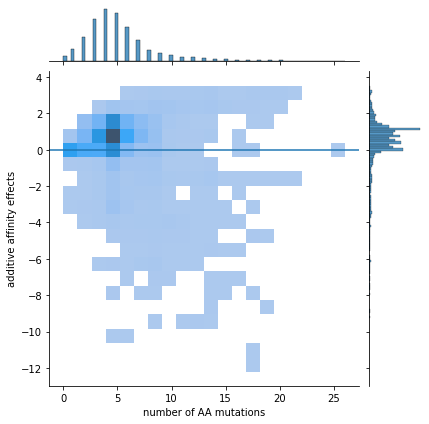

In [4]:
g = sns.jointplot(data=df, x="number of AA mutations", y="additive affinity effects", kind="hist", joint_kws=dict(bins=20))
g.ax_joint.axhline(0)
plt.show()

## DMS

In [5]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,mutant,codon,single_nt,bind,delta_bind,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,A,GAG,True,10.48829,0.03110,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,C,GAG,False,10.44477,-0.01243,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,D,GAG,True,10.42771,-0.02948,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,E,GAG,True,10.45719,0.00000,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,F,GAG,False,10.51899,0.06180,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R124(L)S,CGG_naive,R,235,124,L,S,CGT,True,10.44756,-0.00963,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-124
R124(L)T,CGG_naive,R,235,124,L,T,CGT,False,10.43023,-0.02696,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-124
R124(L)V,CGG_naive,R,235,124,L,V,CGT,False,10.38231,-0.07488,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-124


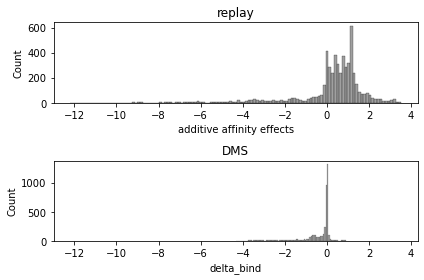

In [6]:
plt.subplot(211)
ax = sns.histplot(data=df, x="additive affinity effects", color="grey")
plt.title("replay")
plt.subplot(212, sharex=ax)
sns.histplot(data=dms_df, x="delta_bind", color="grey")
plt.title("DMS")
plt.tight_layout()
plt.show()

In [7]:
quantiles = df["additive affinity effects"].quantile(np.linspace(0, 1, 30))
quantiles

0.000000   -12.195310
0.034483    -3.802217
0.068966    -2.515879
0.103448    -1.434356
0.137931    -0.559618
0.172414    -0.151392
0.206897    -0.026676
0.241379     0.009181
0.275862     0.091501
0.310345     0.166809
0.344828     0.287520
0.379310     0.331000
0.413793     0.377204
0.448276     0.504505
0.482759     0.565319
0.517241     0.679860
0.551724     0.750917
0.586207     0.817262
0.620690     0.865820
0.655172     0.975245
0.689655     1.067114
0.724138     1.112365
0.758621     1.167219
0.793103     1.196820
0.827586     1.230530
0.862069     1.339020
0.896552     1.515866
0.931034     1.840444
0.965517     2.261974
1.000000     3.517890
Name: additive affinity effects, dtype: float64

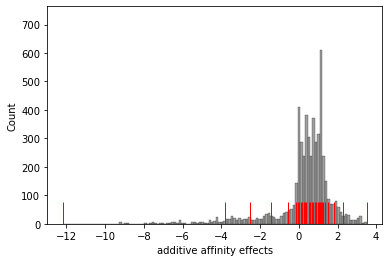

In [8]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(x=quantiles, height=0.1, color="red")
plt.show()

In [9]:
idxs = []

for q in quantiles:
    closest = np.inf
    for i in range(len(df)):
        delta = abs(df.loc[i, "additive affinity effects"] - q)
        if delta < closest:
            closest = delta
            closest_i = i
    idxs.append(closest_i)

df.loc[idxs].to_csv("/Users/wdewitt/Downloads/quantile_design.csv")
df.loc[idxs]

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
5271,mouse8_GC87,seq1,18,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...",-12.19531
1551,mouse2_GC23,seq31,6,"R18(L)G,S26(L)G,T37(L)I,Y55(L)H,L112(L)P,I122(L)K",-3.80422
326,mouse1_GC4,seq51,5,"Y52(H)H,S64(H)T,A40(L)G,Y42(L)F,I122(L)V",-2.51538
282,mouse1_GC4,seq65,6,"N40(H)I,Y67(H)S,N92(H)S,Y42(L)F,Q105(L)H,I122(L)M",-1.43636
5039,mouse8_GC84,seq43,14,"L4(H)V,D28(H)A,G37(H)D,S57(H)N,Y67(H)S,T101(H)...",-0.55945
2348,mouse2_GC40,seq53,2,"Y67(H)H,L112(L)P",-0.15258
2396,mouse2_GC40,seq45,5,"Y58(H)F,T37(L)A,Y42(L)F,E101(L)D,Q105(L)H",-0.02657
3578,mouse4_GC50,seq44,4,"I78(H)L,N92(H)T,A100(H)G,Y42(L)C",0.00879
4724,mouse6_GC75,seq67,5,"K49(H)E,S64(H)T,Y88(H)C,A105(H)G,V110(H)L",0.09157
2048,mouse2_GC31,seq2,6,"S36(H)T,S59(H)T,T37(L)I,A40(L)G,P46(L)T,S109(L)N",0.16653


## Tatsuya's designs

In [10]:
mice = [2,
1,
1,
2,
5,
5,
3,
4,
4,
4,
5,
5,
4,
5,
2,
1,
1,
5,
2,
3,
3,
3,
1,
1]

gcs = [38,
5,
5,
23,
83,
81,
57,
70,
47,
47,
78,
82,
50,
78,
30,
15,
1,
79,
25,
66,
66,
44,
7,
3]

seqids = ["seq4",
"4",
"seq26",
"seq60",
"seq8",
"seq37",
"seq20",
"seq2",
"seq26",
"seq59",
"15",
"13",
"seq4",
"seq51",
"seq4",
"2",
"31",
"seq33",
"seq43",
"seq3",
"11",
"seq4",
"18",
"seq14"]

TA_nodes = [(f"mouse{mouse}_GC{gc}", seqid) for mouse, gc, seqid in zip(mice, gcs, seqids)]

TA_idxs = [(row.GC, str(row.seq_id)) in TA_nodes for i, row in df.iterrows()]

df.iloc[TA_idxs]

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
4,mouse1_GC1,31,4,"N40(H)H,N108(L)D,Y110(L)S,E121(L)Q",-7.71074
215,mouse1_GC3,seq14,6,"L50(H)F,S57(H)N,S77(H)T,T96(H)S,A105(H)G,N108(L)K",1.20081
335,mouse1_GC5,4,3,"E97(L)D,Q106(L)H,L112(L)P",-0.67113
342,mouse1_GC5,seq26,4,"E97(L)D,Q105(L)H,Q106(L)H,L112(L)P",-0.48801
539,mouse1_GC7,18,2,"Y87(H)H,V39(L)I",-1.04789
818,mouse1_GC15,2,3,"T96(H)N,A105(H)G,N28(L)S",0.37619
1607,mouse2_GC23,seq60,7,"S57(H)N,S59(H)N,S64(H)R,N85(H)S,A105(H)G,Q105(...",-1.61417
1759,mouse2_GC25,seq43,2,"R67(L)K,K119(L)Q",-0.06319
1945,mouse2_GC30,seq4,3,"D28(H)A,N40(H)C,A40(L)S",0.76985
2240,mouse2_GC38,seq4,3,"R67(L)K,Q105(L)H,L112(L)I",0.53801


Plot histogram of additive affinity, blue ticks showing quantile-based designs, and orange ticks showing Tatsuya's designs

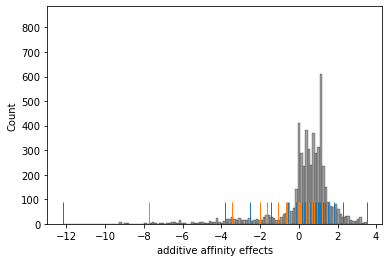

In [11]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(x=quantiles, height=0.1, color="C0")
sns.rugplot(x=df["additive affinity effects"].iloc[TA_idxs], height=0.1, color="C1")
plt.show()